In [13]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [15]:
data = "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv"

In [6]:
df = pd.read_csv(data)

df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

df.churn = (df.churn == 'yes').astype(int)

In [7]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

In [8]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod'
]

In [9]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression()
model.fit(X_train, y_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [29]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()

np.float64(0.801277501774308)

In [30]:
# ACCURACY AND DUMMY MODEL
# Evaluate the model on different thresholds
# Check the accuracy of dummy baselines

In [31]:
len(y_val)

1409

In [35]:
(y_val == churn_decision).sum()

np.int64(1129)

In [36]:
1129/1409

0.801277501774308

In [42]:
from sklearn.metrics import accuracy_score

In [46]:
accuracy_score(y_val, y_pred >= 0.5)

0.801277501774308

In [47]:
thresholds = np.linspace(0, 1, 21)

scores = [ ]

for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.274
0.05 0.509
0.10 0.598
0.15 0.664
0.20 0.707
0.25 0.737
0.30 0.759
0.35 0.766
0.40 0.780
0.45 0.793
0.50 0.801
0.55 0.798
0.60 0.797
0.65 0.784
0.70 0.765
0.75 0.744
0.80 0.730
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


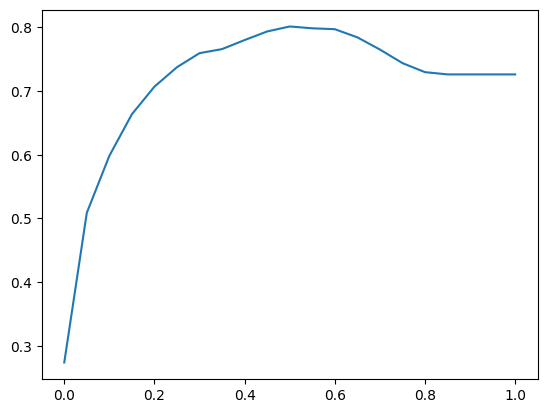

In [48]:
plt.plot(thresholds, scores)

In [52]:
from collections import Counter

In [53]:
Counter(y_pred >= 1.0)

Counter({np.False_: 1409})

In [54]:
Counter(y_val)

Counter({np.int64(0): 1023, np.int64(1): 386})

In [56]:
1 - y_val.mean()

np.float64(0.7260468417317246)

In [57]:
# CONFUSION TABLE
# Different types of errors and correct decisions
# Arranging them in a table

In [58]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [62]:
t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [66]:
predict_positive[:10]

array([False, False, False,  True, False, False, False, False,  True,
       False])

In [67]:
actual_positive[:10]

array([False, False, False,  True, False, False, False, False,  True,
        True])

In [70]:
predict_positive[:10] & actual_positive[:10]

array([False, False, False,  True, False, False, False, False,  True,
       False])

In [75]:
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

In [76]:
tp, tn

(np.int64(214), np.int64(915))

In [77]:
fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

In [78]:
fp, fn

(np.int64(108), np.int64(172))

In [79]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])
confusion_matrix

array([[915, 108],
       [172, 214]])

In [81]:
(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.65, 0.08],
       [0.12, 0.15]])

In [82]:
# PRECISION & RECALL

In [83]:
(tp + tn) / (tp + tn + fp + fn)

np.float64(0.801277501774308)

In [84]:
p = tp / (tp + fp)
p

np.float64(0.6645962732919255)

In [85]:
tp + fp

np.int64(322)

In [86]:
r = tp / (tp + fn)
r

np.float64(0.5544041450777202)

In [87]:
tp + fn

np.int64(386)

In [111]:
# ROC CURVES
# True Positive Rate(TPR) & False Positive Rate(FPR)

In [112]:
tpr = tp / (tp + fn)
tpr

np.float64(0.5544041450777202)

In [113]:
fpr = fp / (fp + tn)
fpr

np.float64(0.10557184750733138)

In [144]:
scores = []

thresholds = np.linspace(0, 1, 108)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    scores.append((t, tp, fp, fn, tn))

In [145]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)

In [146]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

In [147]:
df_scores[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.000000,386,1023,0,0,1.000000,1.000000
10,0.093458,369,565,17,458,0.955959,0.552297
20,0.186916,343,376,43,647,0.888601,0.367546
30,0.280374,299,265,87,758,0.774611,0.259042
40,0.373832,265,199,121,824,0.686528,0.194526
50,0.467290,225,124,161,899,0.582902,0.121212
60,0.560748,183,77,203,946,0.474093,0.075269
70,0.654206,114,34,272,989,0.295337,0.033236
80,0.747664,31,7,355,1016,0.080311,0.006843
90,0.841121,0,0,386,1023,0.000000,0.000000


In [148]:
df_scores.threshold.dtype

dtype('float64')

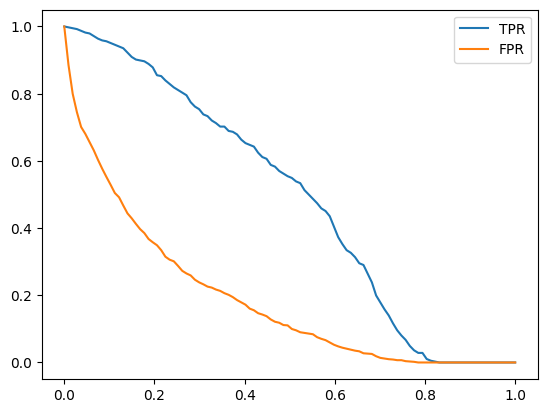

In [149]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')
plt.legend()
plt.show()

In [150]:
# RANDOM MODEL

In [151]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_val))

In [153]:
((y_rand >= 0.5) == y_val).mean()

np.float64(0.5017743080198722)

In [154]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 108)
    
    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)
    
        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)
    
        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()
    
        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()
    
        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)
    
    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

    return df_scores
    

In [158]:
df_rand = tpr_fpr_dataframe(y_val, y_rand)

In [159]:
df_rand[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.000000,386,1023,0,0,1.000000,1.000000
10,0.093458,350,926,36,97,0.906736,0.905181
20,0.186916,315,840,71,183,0.816062,0.821114
30,0.280374,283,740,103,283,0.733161,0.723363
40,0.373832,248,648,138,375,0.642487,0.633431
50,0.467290,214,548,172,475,0.554404,0.535679
60,0.560748,175,456,211,567,0.453368,0.445748
70,0.654206,144,349,242,674,0.373057,0.341153
80,0.747664,106,262,280,761,0.274611,0.256109
90,0.841121,67,167,319,856,0.173575,0.163245


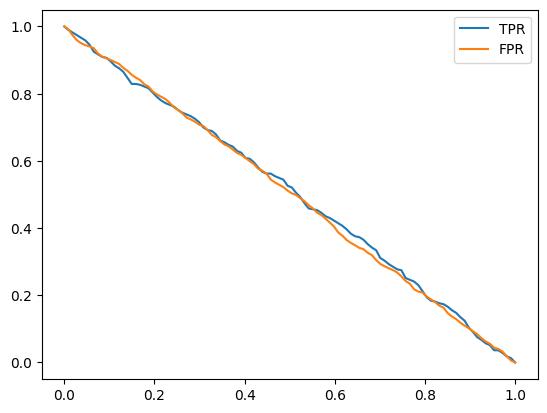

In [160]:
plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR')
plt.plot(df_rand.threshold, df_rand['fpr'], label='FPR')
plt.legend()
plt.show()

In [161]:
# IDEAL MODEL